# P6

## Barabasi albert alg

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

### Task 1

In [2]:
def ba_graph(m0, m, N):

    G = nx.complete_graph(m0)
    
    # List where each node appears degree times
    repeated_nodes = []
    for node in G.nodes():
        repeated_nodes.extend([node] * G.degree(node))

    for new_node in range(m0, N):
        targets = set()
        while len(targets) < m:
            targets.add(random.choice(repeated_nodes))

        G.add_node(new_node)
        for t in targets:
            G.add_edge(new_node, t)
            repeated_nodes.append(t)

        repeated_nodes.extend([new_node] * m)

    return G

In [3]:
G = ba_graph(3, 2, 10)

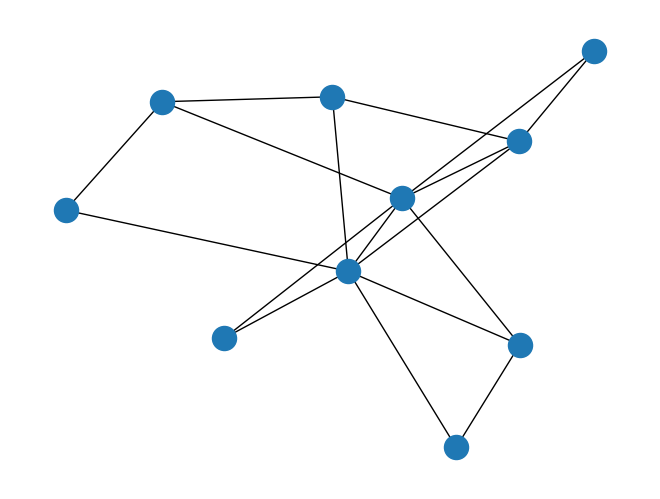

In [4]:
nx.draw(G)

### Task 2

In [5]:
from IPython.display import clear_output
import time

In [6]:
def animate_ba_notebook(m0=5, m=2, steps=50, delay=0.5):
    # Repeated logic 
    G = nx.complete_graph(m0)

    repeated_nodes = []
    for n in G.nodes():
        repeated_nodes.extend([n] * G.degree(n))

    pos = nx.spring_layout(G)

    for new_node in range(m0, m0 + steps):
        targets = set()
        while len(targets) < m:
            targets.add(random.choice(repeated_nodes))

        G.add_node(new_node)
        for t in targets:
            G.add_edge(new_node, t)
            repeated_nodes.append(t)

        repeated_nodes.extend([new_node] * m)

        # Layout
        pos = nx.spring_layout(G, pos=pos, iterations=3)

        clear_output(wait=True)   # zeby nie robilo nowych plotow
        plt.figure(figsize=(6, 6))
        sizes = [G.degree(n) * 40 for n in G.nodes()]
        nx.draw(
            G,
            pos,
            node_size=sizes,
            node_color="steelblue",
            edge_color="gray",
        )
        plt.title(f"BA network growth (N={G.number_of_nodes()})")
        plt.axis("off")
        plt.show()

        time.sleep(delay)


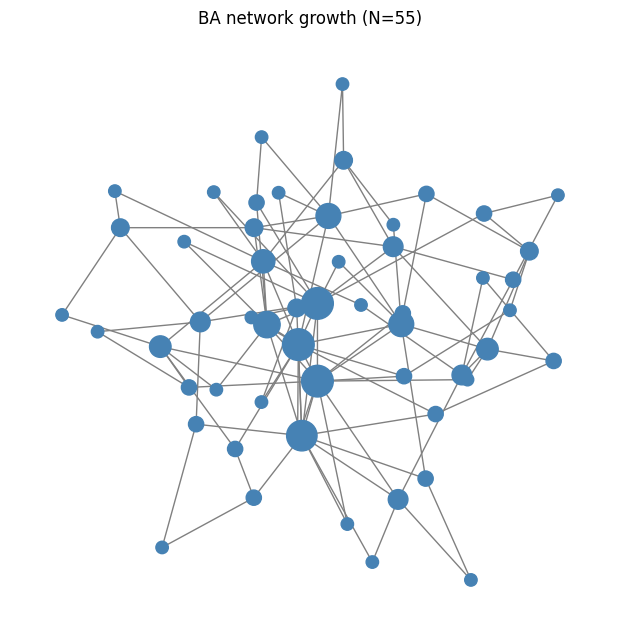

In [7]:
animate_ba_notebook(delay=0.3)

### Task 3

In [20]:
def degree_distribution(G):
    degrees = [d for _, d in G.degree()]
    return degrees

In [21]:
def plot_degree_distribution(G):
    degrees = degree_distribution(G)
    hist, bins = np.histogram(degrees, bins=50, density=True)

    x = (bins[:-1] + bins[1:]) / 2

    plt.figure()
    plt.loglog(x, hist, 'o')
    plt.xlabel("k")
    plt.ylabel("P(k)")
    plt.title("Degree distribution (log-log)")
    plt.show()

In [22]:
G = ba_graph(5, 2, 200)

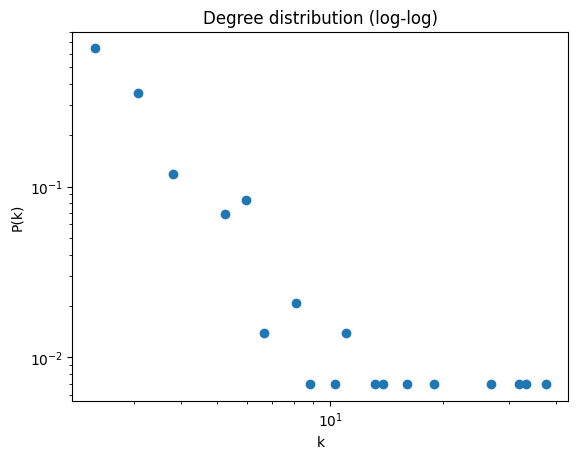

In [23]:
plot_degree_distribution(G)

### Task 4

In [99]:
def estimate_alpha(G):
    degrees = degree_distribution(G)
    hist, bins = np.histogram(degrees, bins=50, density=True)
    x = (bins[:-1] + bins[1:]) / 2

    mask = (hist > 1e-6)
    log_x = np.log(x[mask])
    log_y = np.log(hist[mask])
    slope, intercept, *_ = linregress(log_x, log_y)
    alpha = -slope

    print("Estimated alpha:", alpha)
    return alpha

In [100]:
Gs = ba_graph(3, 2, 100000)

In [101]:
estimate_alpha(Gs)

Estimated alpha: 2.9237265781824644


np.float64(2.9237265781824644)

## Task 5

In [112]:
n = 10000  # total nodes
m = 3     # edges per new node

# Keep track of when each node was added
G = nx.complete_graph(m)
addition_time = {i: 0 for i in range(m)}  # start nodes


for t in range(m, n):
    nodes = list(G.nodes()) * m
    targets = set()
    while len(targets) < m:
        targets.add(np.random.choice(nodes))
    G.add_node(t)
    for target in targets:
        G.add_edge(t, target)
    nodes.extend(targets)
    nodes.extend([t]*m)
    addition_time[t] = t

In [113]:
t_final = n
theoretical_degrees = {}
for i in G.nodes():
    t_i = addition_time[i] if i >= m else 0.5  # no division by zero
    theoretical_degrees[i] = m * np.sqrt(t_final / t_i)

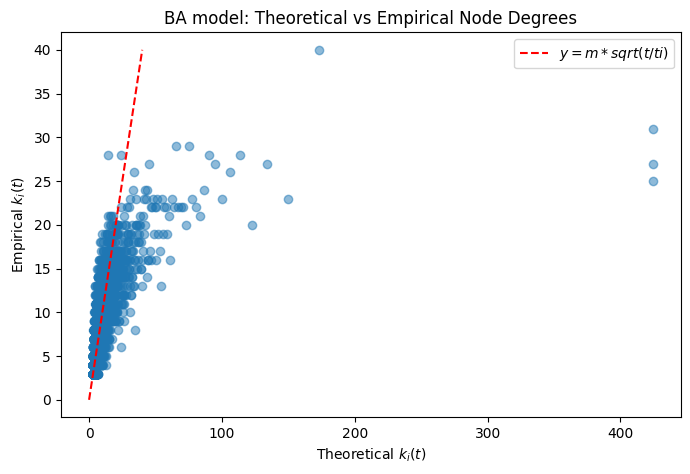

In [114]:
empirical_degrees = dict(G.degree())

plt.figure(figsize=(8,5))
plt.scatter(list(theoretical_degrees.values()), list(empirical_degrees.values()), alpha=0.5)
plt.plot([0, max(empirical_degrees.values())], [0, max(empirical_degrees.values())], 'r--', label="$y=m*sqrt(t/ti)$")
plt.xlabel("Theoretical $k_i(t)$")
plt.ylabel("Empirical $k_i(t)$")
plt.title("BA model: Theoretical vs Empirical Node Degrees")
plt.legend()
plt.show()